<a href="https://colab.research.google.com/github/rnop/WSB-Top-Tickers-and-Sentiment-Analysis-Project/blob/main/Automated_Sentiment_Analysis_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import scraper_utils.py and stock ticker list
import os
if os.path.isfile("/content/scraper_utils.py"):
  print("'scraper_utils.py' is already downloaded.") 
else:
  !wget https://raw.githubusercontent.com/rnop/WSB-Top-Tickers-and-Sentiment-Analysis-Project/main/scraper_utils.py # download CSV

if os.path.isfile("/content/nasdaq_tickers.csv"):
  print("'nasdaq_tickers.csv' is already downloaded.") 
else:
  ! wget https://raw.githubusercontent.com/rnop/WSB-Top-Tickers-and-Sentiment-Analysis-Project/main/nasdaq_tickers.csv # download CSV

In [4]:
# Install libraries
!pip install praw
!pip install transformers
!pip install emoji
!pip install vaderSentiment

     |████████████████████████████████| 176 kB 5.4 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 3.3 MB 5.0 MB/s 
     |████████████████████████████████| 3.3 MB 21.7 MB/s 
     |████████████████████████████████| 596 kB 62.0 MB/s 
     |████████████████████████████████| 895 kB 49.6 MB/s 
     |████████████████████████████████| 61 kB 464 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 170 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=6ac802dc2ca6ca1d7b9b26f3937d9b86a53e1dbc52783543b5f01d7d39921aeb
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji
     |████████████████████████████████| 125 kB 5.2 MB/s 


In [5]:
from scraper_utils import * 
import pandas as pd

In [6]:
# Connect to Reddit API via praw
reddit_creds = praw.Reddit(client_id='***', 
                           client_secret='***', 
                           user_agent='***', 
                           check_for_async=False) 

start = str(datetime.datetime.now())[:10] # Today's date to start scraping from
days_to_scrape = 365 # How many days to scrape from today's date
end = str(datetime.datetime.now() - pd.Timedelta(days=days_to_scrape))[:10]

urls = get_daily_discussion_urls(subreddit='wallstreetbets', before_date= start, after_date=end) # Obtain URLs of Daily Submission Threads within time period
comments = get_comments(urls, reddit_creds) # Scrape Comments Using Each URL
comments_df = comments_to_df(comments, urls) # Read Comments into DataFrame
comments_df = get_tickers(comments_df, 'nasdaq_tickers.csv') # Get tickers in comments
comments_df = get_vader_sentiment(comments_df) # Compute sentiment of each comment
comments_df.set_index('date', inplace=True) # Set datetime index

In [7]:
comments_df.sample(10) # Sample comments and their VADER sentiment

,comment,title,ticker_in_comment,vader_sentiment,vader_sentiment_label
date,,,,,
2021-05-12,The second Powell says the word Interest were ...,"Daily Discussion Thread for May 12, 2021",[],-0.3400,NEG
2021-09-01,Rent a ****,"Daily Discussion Thread for September 01, 2021",[],0.0000,NEU
2020-12-17,EOD,"Daily Discussion Thread for December 17, 2020",[],0.0000,NEU
2021-05-07,i refuse to buy spy calls at this impossibru p...,"Daily Discussion Thread for May 07, 2021",[SPY],0.8689,POS
2021-05-03,JPOW purposefully made the audio quality *** ...,"Daily Discussion Thread for May 03, 2021",[],0.2577,POS
2021-02-02,"I may be *******, but I’m not stupid enough t...","Daily Discussion Thread for February 02, 2021:...",[],-0.7708,NEG
2021-06-02,BB to $30 AMC to $100 and SNDL to $10 then I c...,"Daily Discussion Thread for June 02, 2021","[BB, AMC]",0.0000,NEU
2021-04-21,"**** me, never going bear again. Oh no no nooo","Daily Discussion Thread for April 21, 2021",[],0.2792,POS
2021-07-16,I own a small business and we stopped taking c...,"Daily Discussion Thread for July 16, 2021",[],0.5994,POS


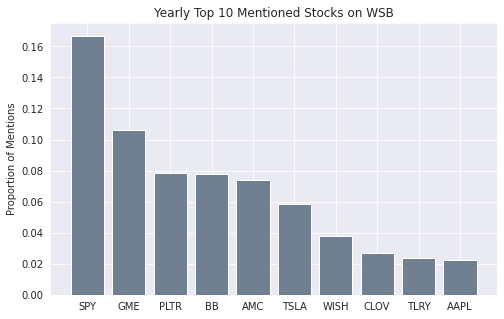

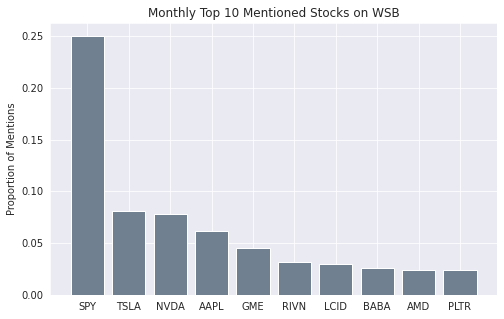

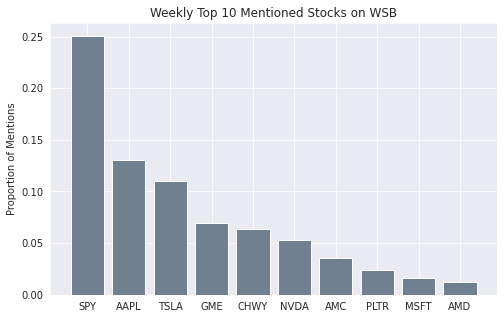

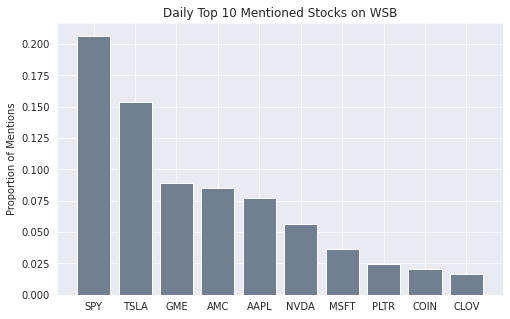

In [8]:
most_mentioned_stocks(comments_df, 'Yearly')
most_mentioned_stocks(comments_df, 'Monthly')
most_mentioned_stocks(comments_df, 'Weekly')
most_mentioned_stocks(comments_df, 'Daily')

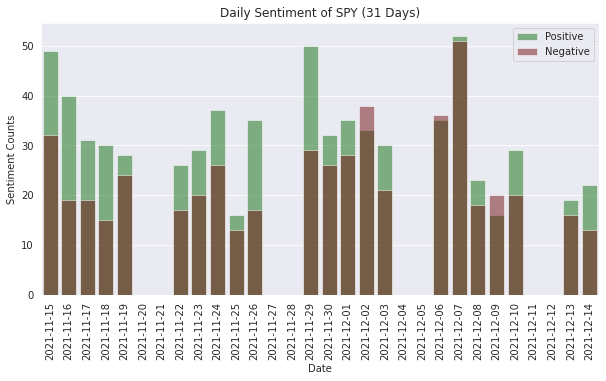

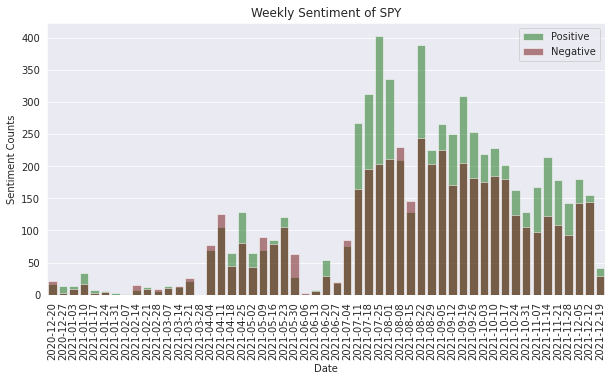

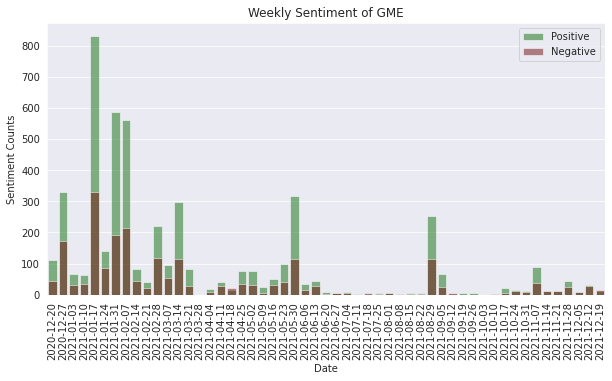

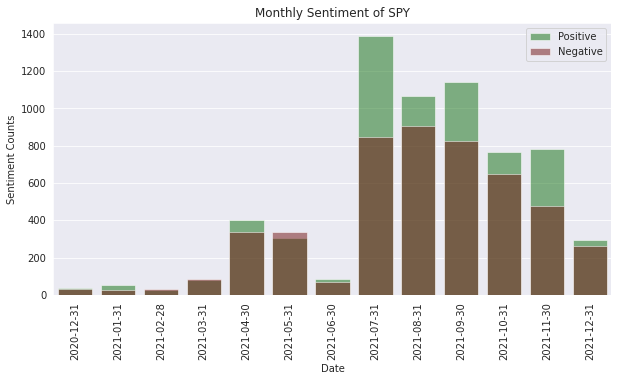

In [12]:
plot_individual_stocks('SPY', comments_df, period='Daily')
plot_individual_stocks('SPY', comments_df, period='Weekly')
plot_individual_stocks('GME', comments_df, period='Weekly')
plot_individual_stocks('SPY', comments_df, period='Monthly')

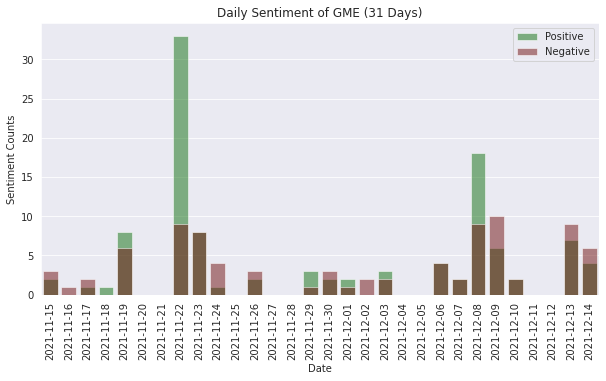

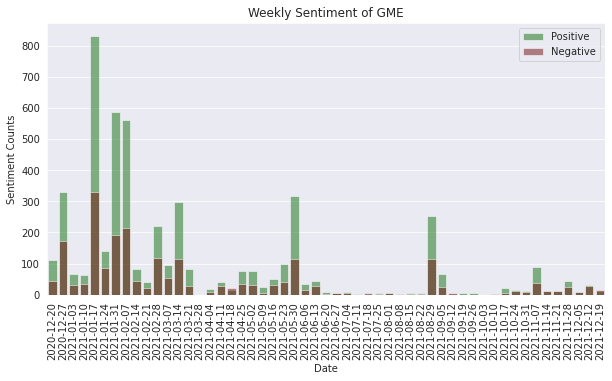

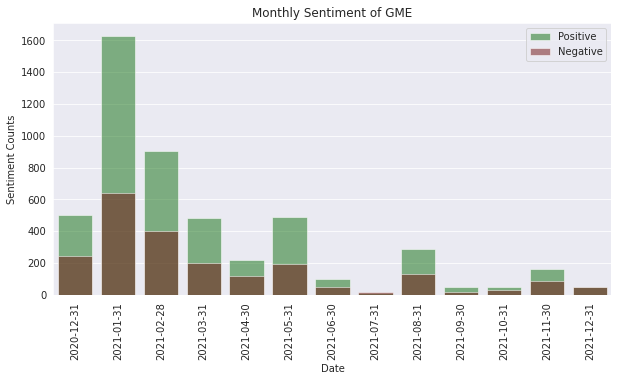

In [11]:
plot_individual_stocks('GME', comments_df, period='Daily')
plot_individual_stocks('GME', comments_df, period='Weekly')
plot_individual_stocks('GME', comments_df, period='Monthly')